<div style="background-color:#000;"><img src="pqn.png"></img></div>

## Load financial data, perform factor analysis, and optimize portfolio

This code loads historical financial data for selected assets and factors. It calculates daily returns and performs factor analysis using principal component regression. The portfolio is optimized using the `riskfolio-lib` library, incorporating the factor loadings. The objective is to maximize the Sharpe ratio while minimizing variance. Finally, it visualizes the optimized portfolio weights in a pie chart.

In [1]:
import yfinance as yf
import riskfolio as rf
import pandas as pd
import warnings
pd.options.display.float_format = "{:.4%}".format
warnings.filterwarnings("ignore")

Define the list of assets in the portfolio

In [2]:
mag_7 = [
    "AMZN",
    "AAPL",
    "NVDA",
    "META",
    "TSLA",
    "MSFT",
    "GOOG",
]

Define the list of factor indices

In [3]:
factors = ["MTUM", "QUAL", "VLUE", "SIZE", "USMV"]

Define the date range for historical data

In [4]:
start = "2020-01-01"
end = "2024-07-31"

Download the historical adjusted close price data for the assets

In [5]:
port_returns = (
    yf
    .download(
        mag_7, 
        start=start, 
        end=end
    )["Adj Close"]
    .pct_change()
    .dropna()
)

[*********************100%%**********************]  7 of 7 completed


Download the historical adjusted close price data for the factors

In [6]:
factor_returns = (
    yf
    .download(
        factors, 
        start=start, 
        end=end
    )["Adj Close"]
    .pct_change()
    .dropna()
)

[*********************100%%**********************]  5 of 5 completed


Initialize the Portfolio object with the asset returns data

In [7]:
port = rf.Portfolio(returns=port_returns)

Compute historical mean returns and covariance matrix using the Ledoit-Wolf shrinkage method

In [8]:
port.assets_stats(method_mu="hist", method_cov="ledoit")

Set the lower return constraint for the portfolio optimization

In [9]:
port.lowerret = 0.00056488 * 1.5

Compute the loadings matrix using principal component regression on factor returns

In [10]:
loadings = rf.loadings_matrix(
    X=factor_returns,
    Y=port_returns, 
    feature_selection="PCR",
    n_components=0.95
)

Display the loadings matrix with a background gradient color mapping

In [11]:
loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
AAPL,0.0006,0.6574,0.2702,0.0832,0.1876,-0.0609
AMZN,0.0003,0.7814,0.2458,0.0017,0.1140,-0.1846
GOOG,0.0005,0.5038,0.2437,0.1110,0.1968,0.0079
META,0.0005,0.7736,0.2974,0.0713,0.1910,-0.1023
MSFT,0.0005,0.7110,0.2721,0.0641,0.1738,-0.0958
NVDA,0.0022,1.4838,0.4343,-0.0386,0.1696,-0.3989
TSLA,0.0019,1.3202,0.3901,-0.0296,0.1562,-0.3494


Set the factor returns and compute their statistics

In [12]:
port.factors = factor_returns
port.factors_stats(
    method_mu="hist",
    method_cov="ledoit",
    feature_selection="PCR",  # Method to select best model, could be PCR or Stepwise,
    dict_risk=dict(
        n_components=0.95  # 95% of explained variance.
    )
)

Optimize the portfolio using a factor model, variance as the risk measure, and Sharpe ratio as the objective function

In [13]:
w = port.optimization(
    model="FM",  # Factor model
    rm="MV",  # Risk measure used, this time will be variance
    obj="Sharpe",  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist=False,  # Use risk factor model for expected returns
)

Plot the optimized portfolio weights as a pie chart

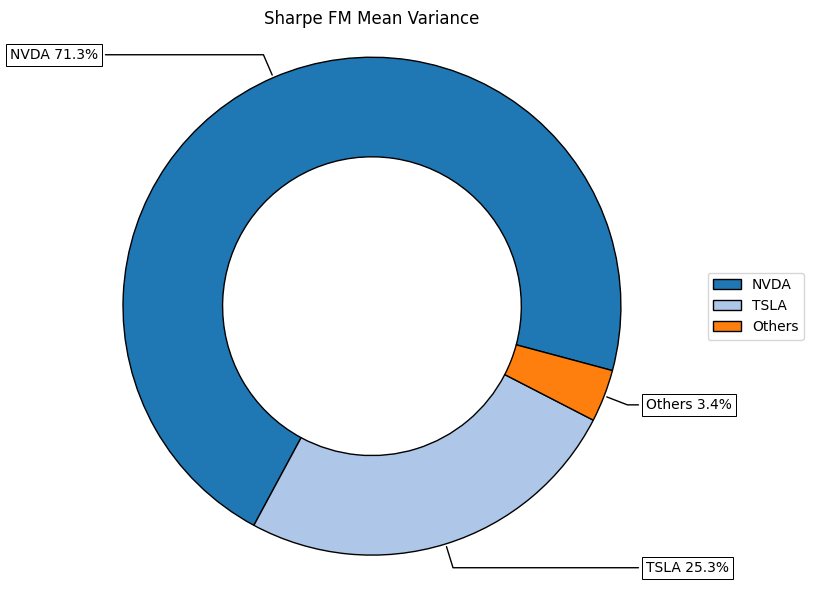

In [14]:
ax = rf.plot_pie(
    w=w,
    title='Sharpe FM Mean Variance',
    others=0.05,
    nrow=25,
    cmap="tab20"
)

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.